<a href="https://colab.research.google.com/github/syafiqahmarsya/analisis-TURF/blob/main/PERBAIKAN_UTS_TURF__SYAFIQAH_MARSYA_KHOLIYADI_11220940000056.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Syafiqah Marsya Kholiyadi  
NIM: 11220940000056  
Kelas: B

Perbaikan UTS TURF

In [12]:
#Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

In [13]:
url = 'https://raw.githubusercontent.com/syafiqahmarsya/analisis-TURF/refs/heads/main/Sales_Dataset.csv'
# Membaca data dari file CSV
df_sales= pd.read_csv(url)


In [14]:
df_sales


,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,B-26370,8825,3594,15,Furniture,Tables,Debit Card,2024-07-31,Megan Mclean,New York,New York City,2024-07
1190,B-26298,2082,642,8,Electronics,Phones,EMI,2020-06-02,Caitlin Hunt,New York,Rochester,2020-06
1191,B-26298,2082,642,8,Electronics,Phones,EMI,2022-12-15,Jenna Holland,Texas,Austin,2022-12
1192,B-26298,2082,642,8,Electronics,Phones,EMI,2020-08-07,Stephanie Oconnell,New York,Buffalo,2020-08


In [15]:
df_sales['Sub-Category'].value_counts()

,count
Sub-Category,
Tables,122
Pens,114
Sofas,114
Markers,110
Electronic Games,104
Paper,104
Phones,101
Printers,95
Laptops,88


In [23]:
df_sales['PaymentMode'].value_counts()

,count
PaymentMode,
Debit Card,260
Credit Card,258
UPI,252
EMI,218
COD,206


In [17]:
import pandas as pd

# Load data
df = pd.read_csv(url)

# Ambil kolom yang relevan
df_selected = df[["Order ID","CustomerName", "Sub-Category", "PaymentMode"]]

# Hilangkan duplikasi pembelian sub-category pada order yang sama
df_selected = df_selected.drop_duplicates()

# Buat kolom sub-category jadi kolom biner (1 jika muncul)
df_turf = df_selected.pivot_table(index=["Order ID", "PaymentMode"],
                                  columns="Sub-Category",
                                  aggfunc=lambda x: 1,
                                  fill_value=0).reset_index()

# Rapikan nama kolom
df_turf.columns.name = None

# Simpan ke file jika perlu
df_turf.to_csv("sales_dataset_TURF.csv", index=False)


In [18]:
df_turf

,Order ID,PaymentMode,Binders,Bookcases,Chairs,Electronic Games,Laptops,Markers,Paper,Pens,Phones,Printers,Sofas,Tables
0,B-25004,COD,0,0,0,0,0,1,0,0,0,0,0,0
1,B-25006,Debit Card,0,0,0,0,0,0,0,1,0,0,0,0
2,B-25010,Credit Card,0,0,0,0,0,0,0,1,0,0,0,0
3,B-25011,UPI,0,0,0,0,0,0,0,0,0,0,1,0
4,B-25022,Debit Card,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,B-26987,EMI,0,0,0,1,0,0,0,0,0,0,0,0
731,B-26988,COD,0,0,0,0,0,1,0,0,0,0,0,0
732,B-26988,UPI,0,0,0,1,0,0,0,0,0,0,0,0
733,B-26993,Debit Card,0,1,0,0,0,0,0,0,0,0,0,0


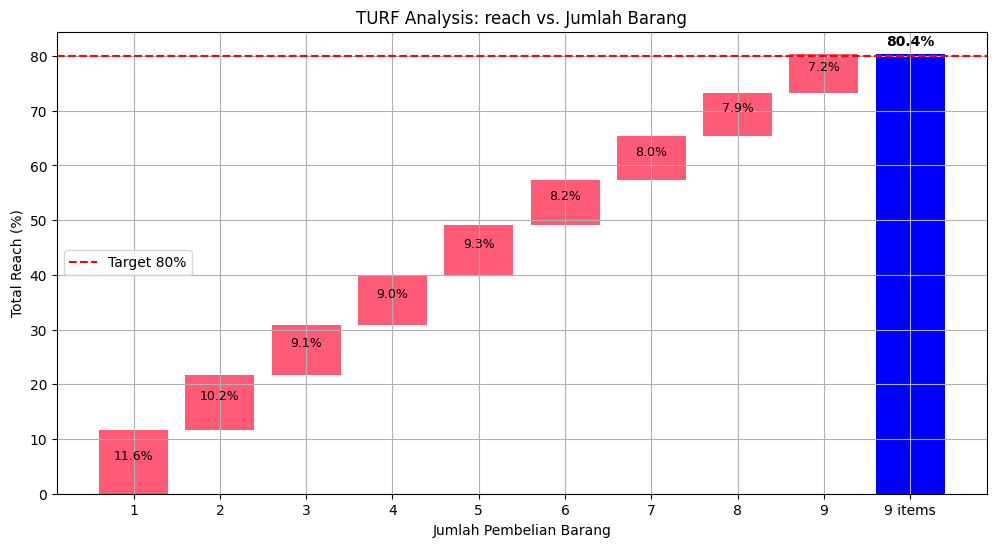

Untuk mencapai minimal 80%, perlu 9 Barang.
Pembelian barang agar mencapai target : ['Pens', 'Sofas', 'Tables', 'Electronic Games', 'Markers', 'Paper', 'Phones', 'Laptops', 'Printers']


In [27]:
# @title Reach vs. Jumlah Pembelian Barang
# pembelian vs. sub category barang
data = "sales_dataset_TURF.csv" #@param {type:"string"}
PaymentMode = 'All' # @param ["All", "Debit Card", "UPI", "Credit Card", "EMI","COD" ]
Target_dalam_persen = 80 # @param

data_used = pd.read_csv(data)
if PaymentMode != 'All':
  data_used = data_used[data_used['PaymentMode']==PaymentMode] #Filter PaymentMode

if len(data_used)==0:
    raise SystemExit("Data kosong! Program dihentikan.")

target_reach_pct = Target_dalam_persen/100
target_reach = int(target_reach_pct * len(data_used))


index_ = data_used.columns.get_loc("Binders")   #nomor kolom data
reach_per_item = data_used[data_used.keys()[(index_):]].sum(axis=0).sort_values(ascending=False)   #hitung frekuensi lalu sorting dari yang terbesar

#Algoritma Greedy untuk menemukan kombinasi optimal
selected_items = []
current_reach = set()
reach_progress = []

for item in reach_per_item.index:    #hitung reach
    new_reach = current_reach | set(data_used.index[data_used[item] == 1])  # Tambah reach baru
    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(data_used))  # Simpan progres reach

    if len(new_reach) >= target_reach:
        break  # Selesai jika sudah mencapai target

    current_reach = new_reach  # Perbarui reach

# Hitung incremental reach
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i-1] for i in range(1, len(reach_progress))]


# Bar chart bertingkat
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar("{}".format(i+1), inc * 100, bottom=bottoms, color="#ff5b77")
    plt.text(i, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='bottom', fontsize=9)
    bottoms += inc * 100
plt.axhline(y=target_reach_pct * 100, color='r', linestyle='--', label=f'Target {target_reach_pct*100:.0f}%')


# Bar terakhir (semua item, misal 50)
total_reach = len(set(data_used.index[data_used[selected_items[-1]] == 1])) / len(data_used)
plt.bar(f"{len(selected_items)} items", reach_progress[-1] * 100, color="blue")
plt.text(len(selected_items), reach_progress[-1] * 100 + 1, f"{reach_progress[-1]*100:.1f}%",
         ha='center', va='bottom', fontsize=10, fontweight='bold')

#Label
plt.xlabel("Jumlah Pembelian Barang")
plt.ylabel("Total Reach (%)")
plt.title("TURF Analysis: reach vs. Jumlah Barang")
plt.legend()
plt.grid(True)
plt.savefig('reach_vs_ads.png')
plt.show()


#Output hasil
max_reach = max(reach_progress)  # Ubah ke persen

if max_reach>=target_reach_pct:
  print(f"Untuk mencapai minimal {target_reach_pct*100:.0f}%, perlu {len(selected_items)} Barang.")
else:
  print(f"Tidak dapat mencapai {target_reach_pct*100:.0f}%.")
  print(f"maksimal hanya {max_reach*100:.0f}%, dengan {len(selected_items)} OOH")

print("Pembelian barang agar mencapai target :", selected_items[:len(selected_items)])  # Menampilkan lokasi iklan agar optimal


* **Untuk semua metode pembayaran**     
Untuk mencapai minimal target jangkauan 80% dibutuhkan 9 kombinasi barang diantaranya: Pens, Sofas, Tables, Electronic Games, Markers, Paper, Phones, Laptops, Printers.

* **Untuk metode pembayaran debit card**   
Untuk mencapai minimal target jangkauan 80% dibutuhkan 9 kombinasi barang diantaranya: Pens, Paper, Electronic Games, Tables, Phones, Chairs, Printers, Sofas, Laptops.

* **Untuk metode pembayaran UPI (Unified Payments Interface)**    
Untuk mencapai minimal target jangkauan 80% dibutuhkan 9 kombinasi barang diantaranya: Markers, Electronic Games, Tables, Phones, Sofas, Printers, Bookcases, Pens, Paper.

* **Untuk metode pembayaran credit card**   
Untuk mencapai minimal target jangkauan 80% dibutuhkan 9 kombinasi barang diantaranya: Pens, Sofas, Laptops, Markers, Phones, Tables, Electronic Games, Paper, Printers

* **Untuk metode pembayaran EMI (Equated Monthly Installment)**   
Untuk mencapai minimal target jangkauan 80% dibutuhkan 9 kombinasi barang diantaranya: Pens, Markers, Sofas, Laptops, Tables, Paper, Bookcases, Printers, Chairs.

* **Untuk metode pembayaran COD (Cash On Delivery)**   
Untuk mencapai minimal target jangkauan 80% dibutuhkan 9 kombinasi barang diantaranya: Paper, Bookcases, Pens, Sofas, Binders, Electronic Games, Tables, Phones, Chairs.

**Kesimpulan:**

Berdasarkan hasil analisis TURF terlihat bahwa terdapat tujuh jenis barang yang konsisten muncul di semua metode pembayaran, yaitu Pens, Sofas, Tables, Electronic Games, Paper, Phones, dan Printers. Ketujuh barang ini memiliki peran yang sangat signifikan dalam menjangkau sebagian besar pelanggan, terlepas dari metode pembayaran apa yang digunakan. Selain itu, beberapa barang seperti Markers, Laptops, Chairs, dan Bookcases juga sering muncul, meskipun tidak seumum ketujuh barang sebelumnya. Sementara itu, barang seperti Binders hanya relevan pada metode pembayaran tertentu dan tidak berkontribusi secara signifikan. Dengan demikian, ketujuh barang utama tersebut dapat dijadikan fokus utama dalam menetukan strategi pemasaran, promosi, dan pengelolaan stok karena dapat menjangkau berbagai segmen pelanggan berdasarkan metode pembayarannya.
